# **Decision Trees**

# **Pros of Decision Trees:**

Easy to Understand: Their simplicity makes them easy to interpret. You can visualize them as a flowchart.

No Need for Scaling: Decision trees don’t require feature scaling or normalization.

Handles Both Numerical and Categorical Data: Versatile in handling different types of data.

Non-Parametric: No assumption about the distribution of data.

Feature Importance: They provide a clear indication of which features are most important.

# **Cons of Decision Trees:**

Prone to Overfitting: Trees can grow too complex, leading to overfitting. Pruning or setting a maximum depth can mitigate this.

Instability: Small changes in the data can lead to completely different trees.

Bias Towards Features with More Levels: Features with many levels can dominate the tree.

Less Effective with Noisy Data: Sensitive to noise and outliers.

Lack of Smoothness: The boundary created by decision trees may not be as smooth as other algorithms like SVM or logistic regression.

# 1. Read the data

**Dataset variables:**

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

In [ ]:
import pandas as pd

url = "https://drive.google.com/file/d/1P5-3duf5x4zSoL0H3Bz0f45aWoAxV7zK/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.head(3)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0


# 2. Define X and y

In [ ]:
X= data
y = X.pop("Expensive")

# 3. Data Splitting (Train - Test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

## 4. Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

# 6. Dealing with missing data

A strategy is to impute the missing values, i.e., to infer them from the known part of the data. We will use the SimpleImputer() with its default values. It will replace any missing value with the mean of the column it belongs to.

Simple imputer allows these strategies:

mean (default),

median,

most frequent,

constant.

In [ ]:
import sklearn
sklearn. __version__

'1.5.2'

In [ ]:
X_train.isna().sum()

,0
LotArea,0
LotFrontage,202
TotalBsmtSF,0
BedroomAbvGr,0
Fireplaces,0
PoolArea,0
GarageCars,0
WoodDeckSF,0
ScreenPorch,0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [ ]:
# 2. use fit on the train set (calculating the mean)
my_imputer.fit(X_train)

SimpleImputer()

In [ ]:
# 3. use transform on the train set (substituting the NaN values with the mean)
X_imputed_train = my_imputer.transform(X_train)

In [ ]:
X_imputed_train.isnull().sum()

,0
LotArea,0
LotFrontage,0
TotalBsmtSF,0
BedroomAbvGr,0
Fireplaces,0
PoolArea,0
GarageCars,0
WoodDeckSF,0
ScreenPorch,0


# 6.1. Implement a Decision Tree (numerical features + missing values imputed)

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train,
            y = y_train)

DecisionTreeClassifier()


# 6.2. Make predictions and check accuracy on the train set

In [ ]:
# make predictions
y_pred_tree_train = my_tree.predict(X_imputed_train)

**.predict() method**: you pass in the input data (X_imputed_train) for which you want to predict the target variable (or class labels).

In [ ]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

# 7. Check accuracy for the test set
Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

### 7.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [ ]:
# impute_mean to test set
X_imputed_test = my_imputer.transform(X_test)

# 7.2. Make predictions on the test set

In [ ]:
y_pred_tree_test = my_tree.predict(X_imputed_test)

# 7.3. Check accuracy score on the test set

In [ ]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8767123287671232

A **train accuracy of 100%** and a **test accuracy of 88%** suggest that the model is likely **overfitting**. Here’s an interpretation of what this outcome implies:

### Interpretation

1. **Perfect Train Accuracy (100%)**:
   - The model has memorized the training data extremely well, to the point that it can correctly predict every instance. This is unusual in real-world scenarios and often indicates that the model has over-learned specific details in the training set, potentially even noise or irrelevant patterns.

2. **Significantly Lower Test Accuracy (88%)**:
   - Although 88% is still relatively high, the drop from 100% suggests that the model’s performance on unseen data is not as strong as on the training data. This discrepancy implies that the model may not generalize well and is failing to accurately predict some test cases.

### Likely Causes

- **Overfitting**: The model has likely overfitted to the training data. It has learned patterns and specific details that do not generalize well to new data, which is why it performs perfectly on training but not as well on test data.
  
- **Complex Model**: The model might be too complex for the dataset, capturing even minor fluctuations in the training data as if they were significant. This often happens with models like deep decision trees or other high-variance models that can learn specific details too closely.

### Recommendations

1. **Simplify the Model**:
   - If you’re using a decision tree or another complex model, try reducing its depth or complexity. For instance, limit the maximum depth of the tree or use fewer features in the model. Simpler models generalize better and are less prone to overfitting.

2. **Regularization**:
   - Apply regularization techniques to penalize overly complex models and encourage simpler, more generalizable solutions. Regularization terms help prevent the model from fitting to noise in the training data.

3. **Cross-Validation**:
   - Use cross-validation to get a more accurate sense of the model's performance on different subsets of the data. This helps ensure that the model isn’t just memorizing the training set but can generalize to unseen data.

4. **More Data**:
   - If feasible, increase the amount of training data. More data can help the model generalize better and avoid memorizing specific examples.

5. **Consider an Ensemble Model**:
   - In some cases, using ensemble methods like **random forests** or **gradient boosting** (which average predictions from multiple models) can improve generalization, as they are less prone to overfitting than a single decision tree.

### Summary

The high train accuracy and drop to 88% test accuracy indicate overfitting. Addressing this by simplifying the model, using regularization, and implementing cross-validation will likely improve the model's ability to generalize and perform more consistently on unseen data.

# 8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

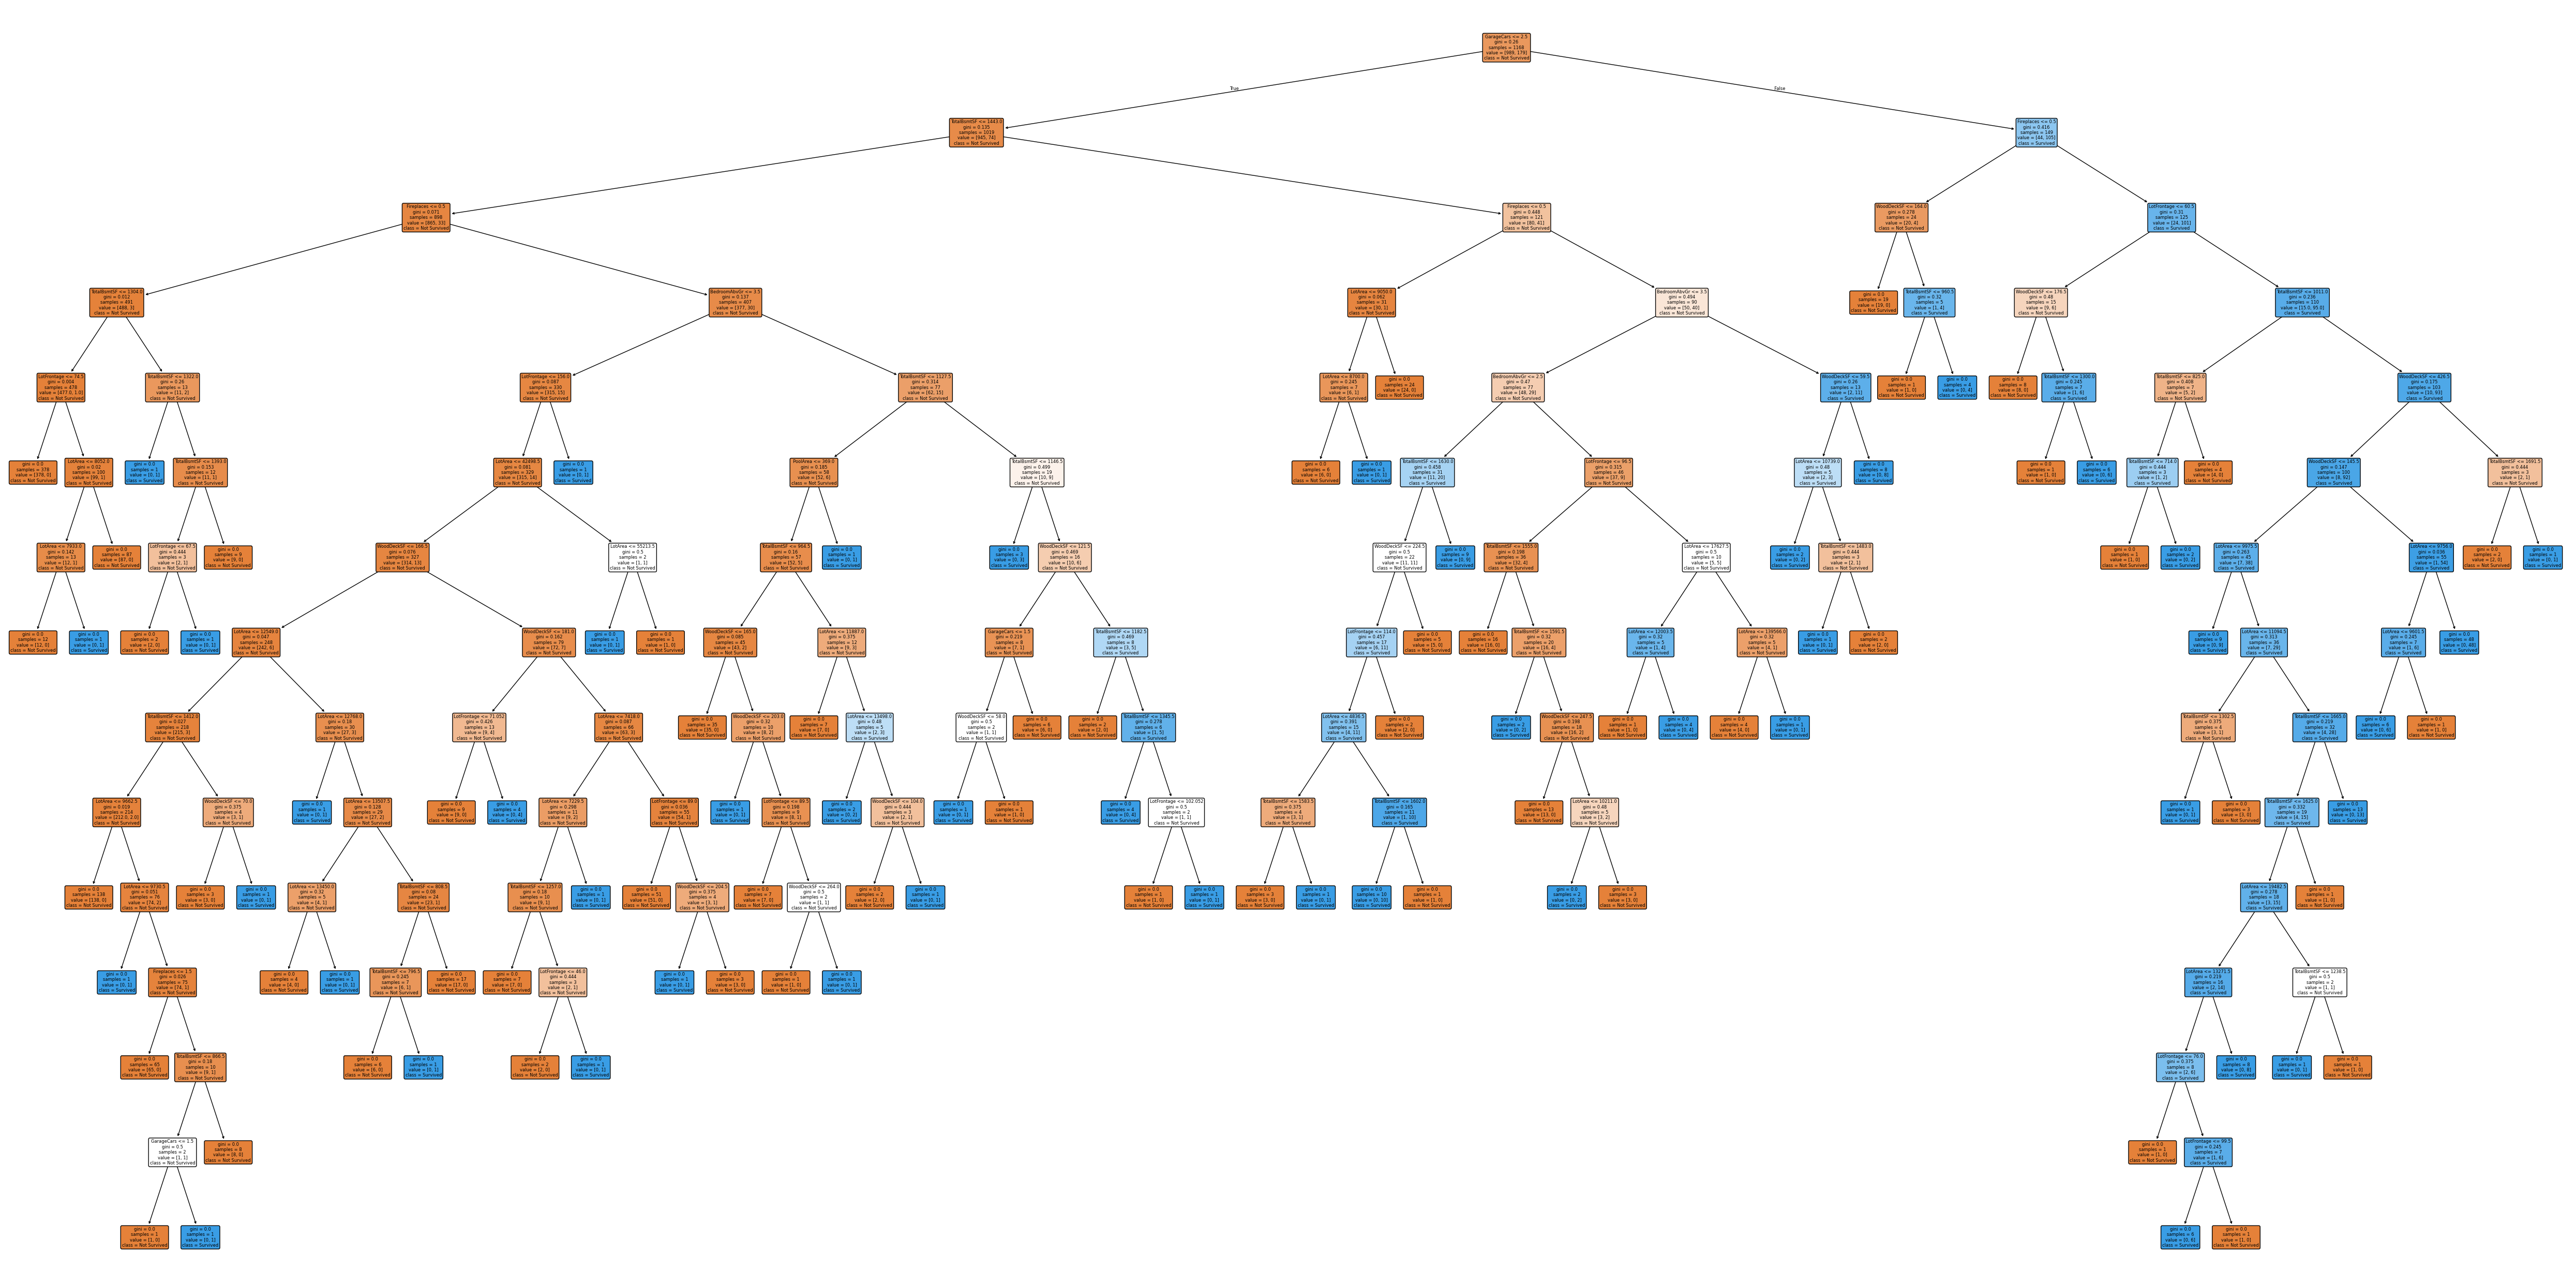

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
    my_tree,                          # Decision tree model to visualize
    filled=True,                      # Whether to fill nodes with colors based on majority class
    rounded=True,                     # Whether to round the corners of the nodes
    class_names=['Not Survived','Survived'],  # Names of the classes for the target variable
    feature_names=X.columns       # Names of the features (columns) in your dataset
);

The current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. We can also say that our model suffers from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

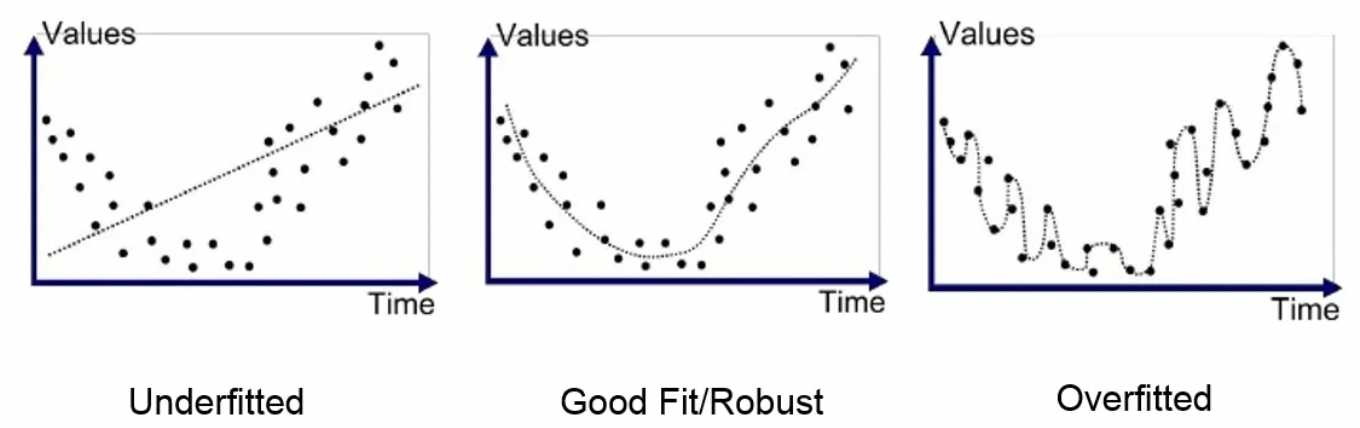

# Tweak the parameters max_depth and min_samples_leaf of the decision tree.

To address the overfitting issue with your decision tree model, tweaking the max_depth and min_samples_leaf parameters can help to limit the complexity of the tree and make it generalize better. Here’s a guide to adjusting these parameters:

Parameters Explanation
max_depth:

This parameter controls the maximum depth of the decision tree. By limiting the depth, you prevent the tree from growing too deep, which helps avoid overfitting.
A shallower depth means the model captures only the most significant splits, improving generalization.
min_samples_leaf:

This parameter sets the minimum number of samples required to be at a leaf node (i.e., the final nodes that make a decision).
Increasing min_samples_leaf forces each leaf node to contain more data points, making the model more robust and less likely to fit noise.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define and fit the model with tuned parameters
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=31416)  # Example values

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the tuned model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", round(train_accuracy, 2))
print("Test Accuracy:", round(test_accuracy, 2))


Train Accuracy: 0.94
Test Accuracy: 0.93


Its high accuracy and consistency between training and test performance suggest that it is a robust model capable of predicting house prices (or the "expensive" classification)

Tuning Tips
Start with Smaller max_depth: Experiment with values like 3, 5, or 10. Smaller values simplify the model, but be cautious of underfitting if the depth is too limited.
Adjust min_samples_leaf: Typical starting values are 5, 10, or higher, depending on your dataset size. Larger values make the model more conservative, reducing overfitting.
Example Interpretation
If both train and test accuracy improve: This indicates the model has better generalization.
If train accuracy drops slightly but test accuracy improves: This is often ideal. A slight reduction in train accuracy with a larger increase in test accuracy indicates the model is no longer overfitting and generalizes better.
Adjust these parameters iteratively, observing how they impact performance, to find an optimal balance for your data. Let me know if you’d like further assistance with model evaluation or specific parameter values!

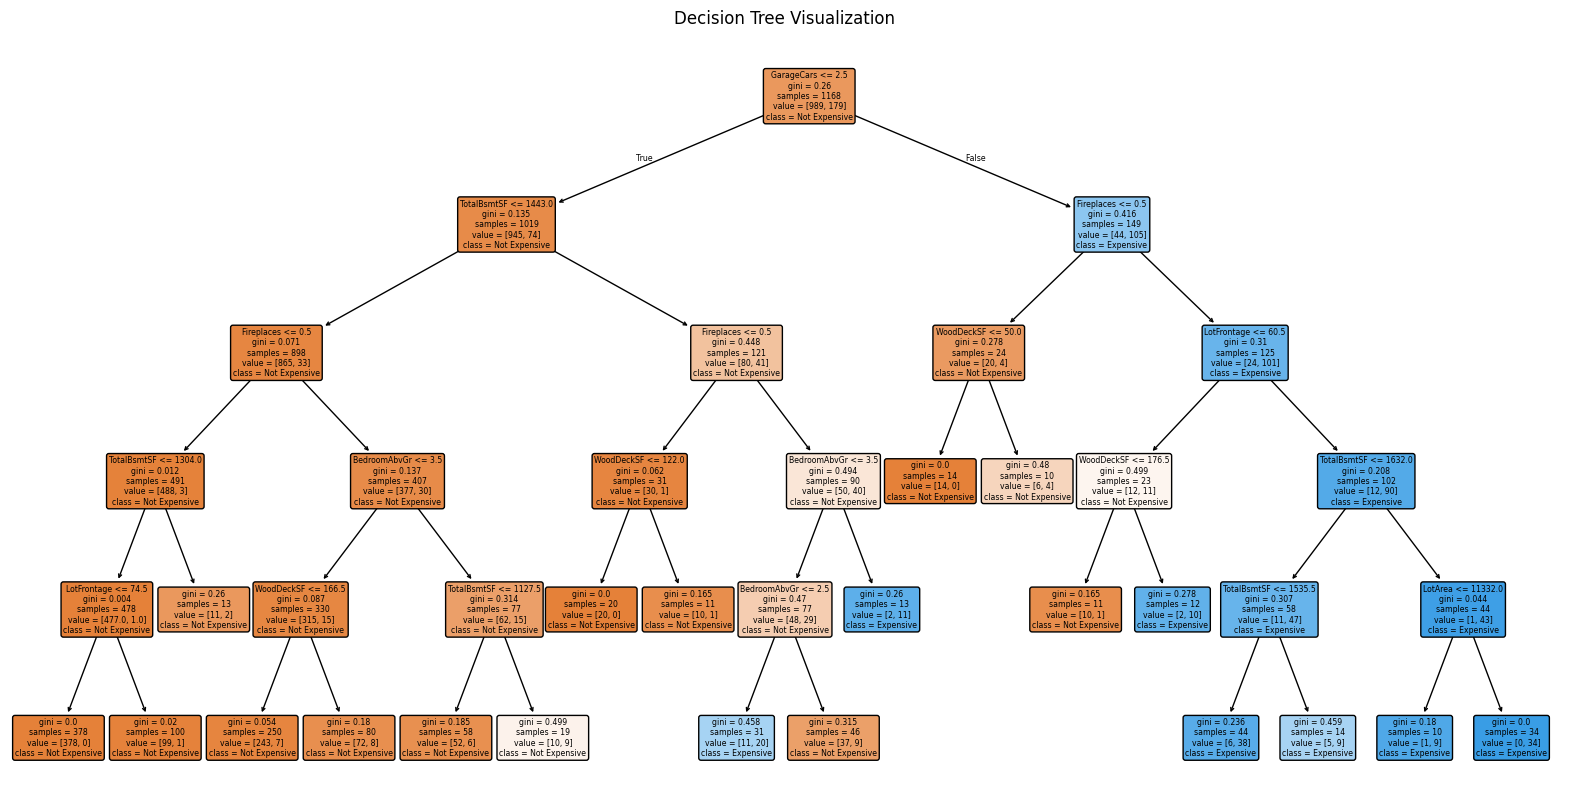

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create the DecisionTreeClassifier with example parameters
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust size as needed for readability
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Not Expensive", "Expensive"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Key Elements in the Tree Nodes
Splitting Criteria:

Each node (except leaf nodes) shows a condition based on a feature (e.g., TotalBsmtSF <= 1443.0), which is a rule used to split the data at that node.
If a data point meets the condition, it follows the left branch; otherwise, it follows the right branch.
Gini Impurity (gini):

The gini value in each node indicates the impurity of the data at that point. A lower Gini value means the samples are more homogeneous (mostly from one class).
For example, a gini of 0.0 means all samples in that node belong to the same class.
Samples:

This shows the number of data points (samples) that reach each node. For instance, the root node has samples = 1168, representing the total number of data points in the dataset.
Value:

The value field represents the distribution of classes in that node. For example, value = [989, 179] means there are 989 "Not Expensive" samples and 179 "Expensive" samples.
Class:

Each node ends with the class label that represents the majority class at that node, i.e., the predicted class. This is either "Not Expensive" or "Expensive."
Path Through the Tree
The tree starts at the root node and follows the conditions down each branch until reaching a leaf node, where a final classification is made.

Root Node:

The root node splits based on GarageCars <= 2.5, with a gini of 0.26, and contains all 1168 samples (value = [989, 179]).
If GarageCars is 2 or less, the data goes left, otherwise it goes right.
Left Subtree (GarageCars <= 2.5):

The left branch splits further based on TotalBsmtSF <= 1443.0.
This branch continues to split on conditions like Fireplaces <= 0.5 and other features (e.g., LotFrontage, WoodDeckSF) until reaching leaf nodes with low Gini values, indicating mostly homogeneous classes.
Right Subtree (GarageCars > 2.5):

The right branch initially has fewer samples (value = [89, 90]) with a higher likelihood of "Expensive" classifications.
It splits further on conditions like Fireplaces <= 0.5, LotFrontage <= 60.5, and TotalBsmtSF, eventually reaching leaf nodes where the class is mostly "Expensive."
Interpretation of Decisions
Nodes Closer to the Root (like GarageCars and TotalBsmtSF) are more influential in the model’s decisions since they split a large portion of the data.
Nodes Deeper in the Tree represent more granular splits and are likely to have less impact on overall predictions, refining predictions for specific groups of samples.
Final Predictions
Each path down the tree leads to a leaf node where the final prediction is made. These leaf nodes have low Gini values, meaning the model has high confidence in its predictions at that point. The color coding (orange for "Not Expensive" and blue for "Expensive") helps visually identify the predominant class at each node.

Summary
The decision tree shows a series of feature-based splits that categorize properties as either "Expensive" or "Not Expensive." Features like GarageCars, TotalBsmtSF, and Fireplaces are critical for making initial distinctions, while further splits (e.g., WoodDeckSF, BedroomAbvGr) refine the classification as the tree progresses. The low Gini values in the leaf nodes indicate that the model has high confidence in its final predictions for each category.

Major hyperparameters:

- **max_depth**: Limits the size of the decision tree. Larger numbers lead to overfitting. A range of **2-15** is reasonable depending on the complexity of the problem and the number of features in the dataset. It can be more if the problem is highly complex.
- **min_samples_leaf**: Requires that any pattern apply to at least this many points in the training data. Higher numbers reduce overfitting. The range should be based on the size and diversity of the dataset. Try a range from **5-30** or so.
- **criterion**: Determines how the algorithm evaluates the best splits to make at each decision node. Try all three.
- **min_impurity_decrease**: Sets the standard for how effective a split must be, limiting the complexity of the model and reducing overfitting when the number is higher. A reasonable range can be from **0 to 0.5** but should generally be closer to **0.1**.
- **ccp_alpha**: Prunes the completed decision tree, removing parts that increase complexity without significantly improving purity. A reasonable range is from **0 to 0.1**.